# 05. forecast(시계열 분석)

## 1. 배경 및 설치

* fbprophet
    - https://facebook.github.io/prophet/
* install
    - 윈도우 유저는 Visual C++ Build Tool을 먼저 설치해주세요
    - https://go.microsoft.com/fwlink/?LinkID=691126
    - conda install pandas-datareader
    - conda install -c conda-forge fbprophet
    - pip install fbprophet

#### fbprophet 설치가 안된다면,

* fbprophet 설치
    - https://blog.naver.com/raingo00/222070240711

---

## 함수(def)의 기초

In [7]:
def test_def(a, b):
    return a + b

In [8]:
c = test_def(2, 3)
c

5

In [9]:
5 + c

10

- 가장 기초적인 모양의 def 정의
- 이름(test_df)과 입력 인자(a, b)를 정해준다
- 출력(return)을 작성

In [10]:
# 전역변수(global)
a = 1

def edit_a(i):
    # 지역변수(local)
    global a
    a = i

In [11]:
edit_a(2)

In [12]:
a

2

- global 변수를 def 내에서 사용하고 싶다면 global로 선언

In [13]:
def edit_a(i):
    a = i

In [14]:
edit_a(5)
print(a)

2


- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다

$$ y = asin(2\pi ft + t_0) + b $$

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

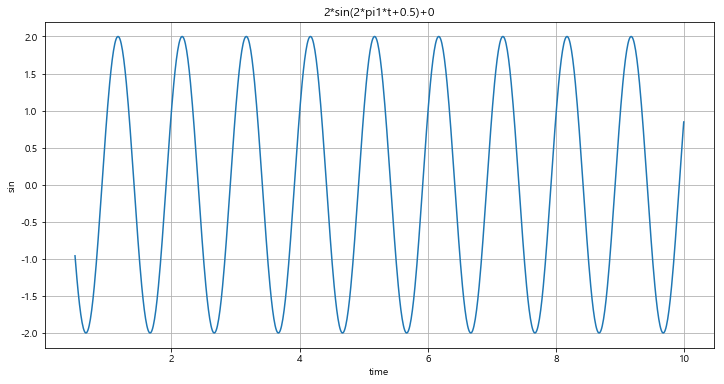

In [17]:
plotSinWave(2, 1, 10, 0.01, 0.5, 0)

In [18]:
def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get('endTime', 1)
    sampleTime = kwargs.get('sampleTime', 0.01)
    amp = kwargs.get('amp', 1)
    freq = kwargs.get('freq', 1)
    startTime = kwargs.get('startTime', 0)
    bias = kwargs.get('bias', 0)
    figsize = kwargs.get('figsize', (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

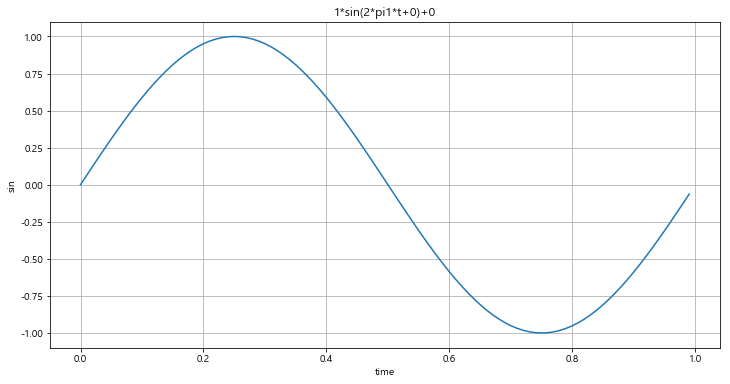

In [19]:
plotSinWave()

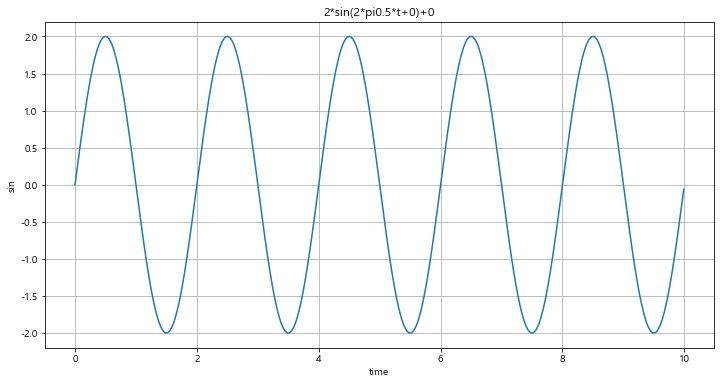

In [20]:
plotSinWave(amp=2, freq=0.5, endTime=10)

## 내가 만든 함수 import
- drawSinWave. 

In [21]:
%%writefile ./drawSinWave2.py

import numpy as np
import matplotlib.pyplot as plt

def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get('endTime', 1)
    sampleTime = kwargs.get('sampleTime', 0.01)
    amp = kwargs.get('amp', 1)
    freq = kwargs.get('freq', 1)
    startTime = kwargs.get('startTime', 0)
    bias = kwargs.get('bias', 0)
    figsize = kwargs.get('figsize', (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()
    
if __name__ == "__main__":
    print('hello world!')
    print('this is test graph!')
    plotSinWave(amp=1, endTime=2)

Overwriting ./drawSinWave2.py


In [22]:
import drawSinWave2 as dS

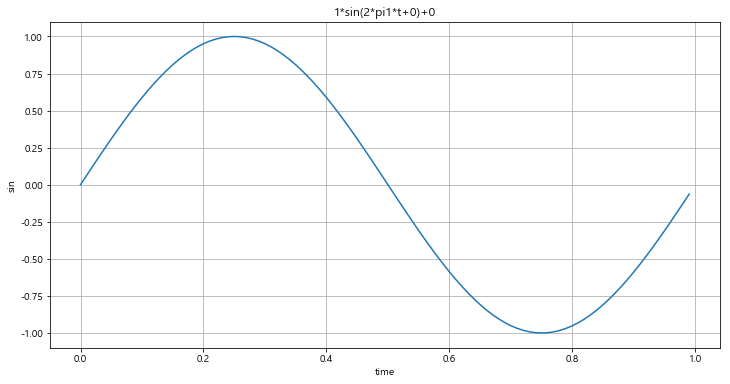

In [23]:
dS.plotSinWave()

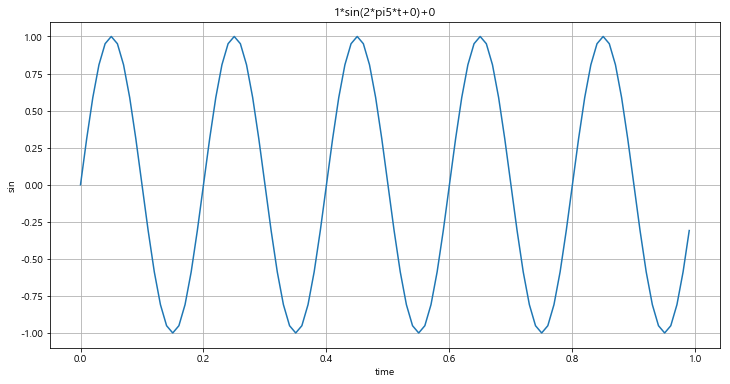

In [24]:
dS.plotSinWave(freq=5)

## 그래프 한글 설정

In [25]:
%%writefile ./set_matplotlib_hangul2.py

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    print('Hangul OK in your MAC!!')
    rc('font', family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    print('Hangul OK in you Windows!!')
    rc('font', family=font_name)
else:
    print('Unknown System..Sorry')
    
plt.rcParams['axes.unicode_minus'] = False

Overwriting ./set_matplotlib_hangul2.py


In [26]:
import set_matplotlib_hangul2

Text(0.5, 1.0, '한글')

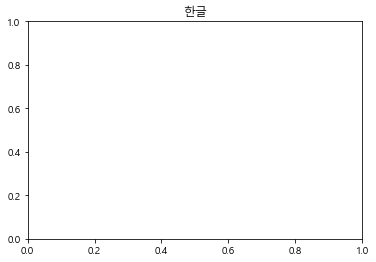

In [27]:
plt.title('한글')

---

## 2. Fbprophet 기초

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1

In [2]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y': result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


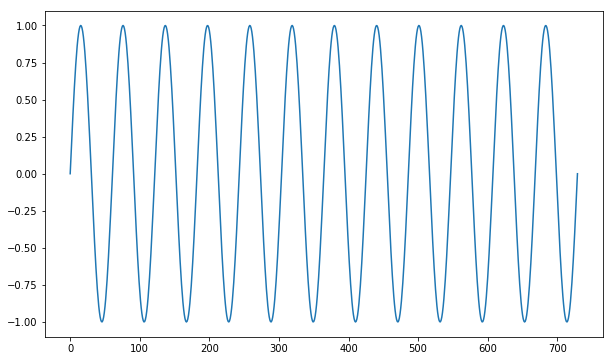

In [3]:
df['y'].plot(figsize=(10, 6));

In [4]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [5]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


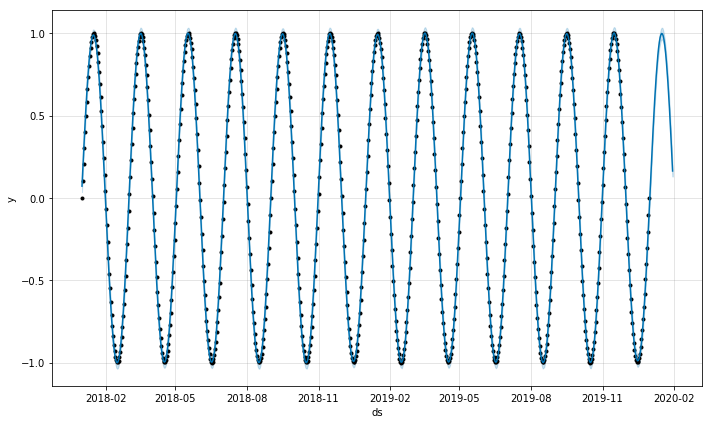

In [7]:
m.plot(forecast);

#### 2

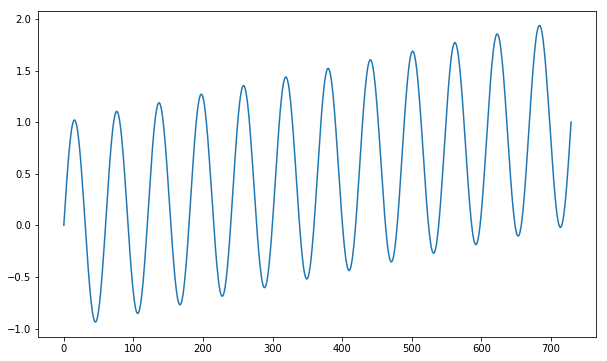

In [8]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y': result})

df['y'].plot(figsize=(10, 6));

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


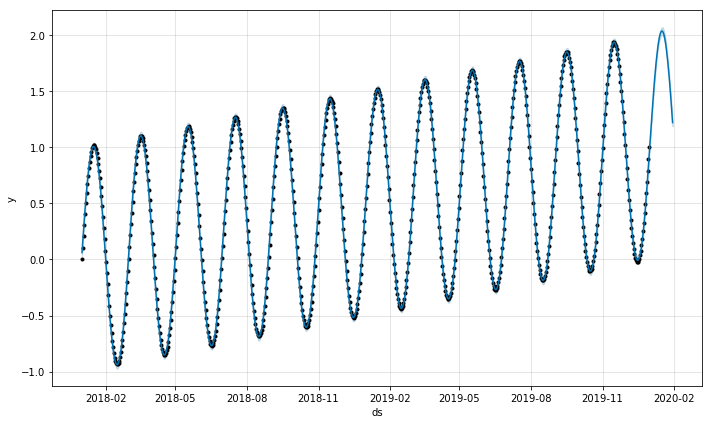

In [9]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

### 3

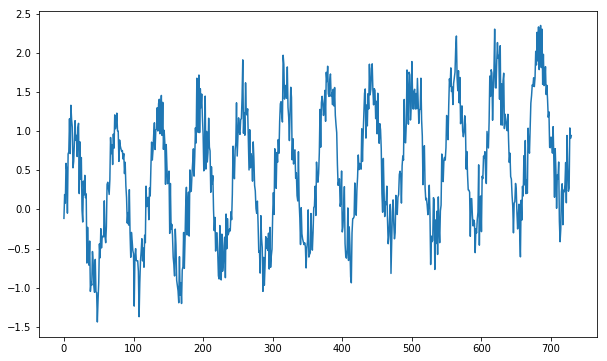

In [10]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range('2018-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y': result})

df['y'].plot(figsize=(10, 6));

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


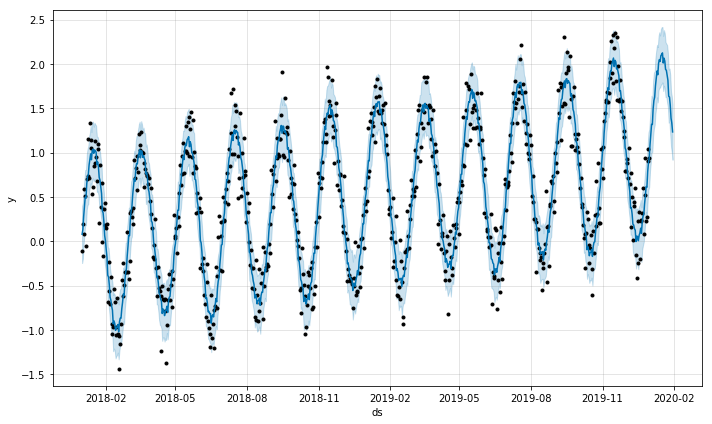

In [11]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

## 3. 시계열 데이터 실전 이용해보기
- https://pinkwink.kr/

In [25]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

%matplotlib inline

In [16]:
pinkwink_web =pd.read_csv(
    '../data/05_PinkWink_Web_Traffic.csv', 
    encoding='utf-8',
    thousands=',',
    names=['date', 'hit'],
    index_col=0
)

pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


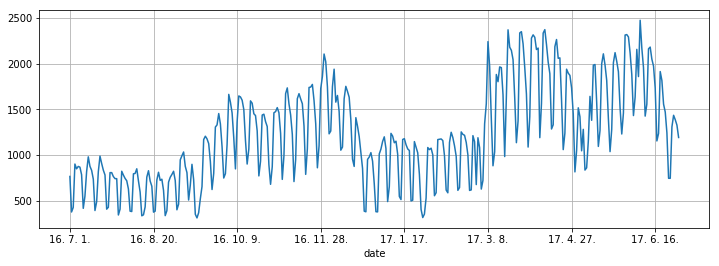

In [17]:
# 전체 데이터 그려보기
pinkwink_web['hit'].plot(figsize=(12, 4), grid=True);

In [19]:
# trend 분석을 시각화하기 위한 x축 값을 만들기
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values
fx = np.linspace(0, time[-1], 1000)

In [21]:
# 에러를 계산할 함수
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [23]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)

In [26]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109637
430.6284101894695
429.53280466762925
330.4777305307993


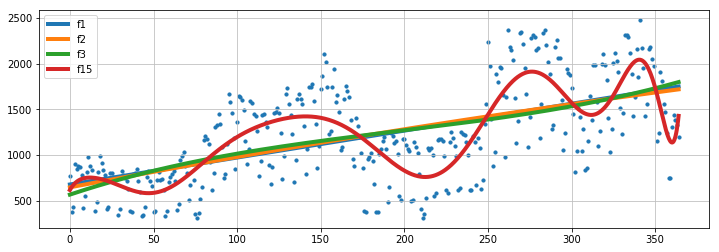

In [27]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc='best')
plt.show()

In [30]:
df = pd.DataFrame({'ds': pinkwink_web.index, 'y': pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
df
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [31]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [32]:
# 60일에 해당하는 데이터 예측
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [34]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,668.790929,1106.461790
421,2017-08-26,481.544412,271.450271,674.034638
422,2017-08-27,614.212001,402.459785,824.659289
423,2017-08-28,1166.966207,960.057026,1367.316398
424,2017-08-29,1203.000155,978.868204,1397.723497


C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


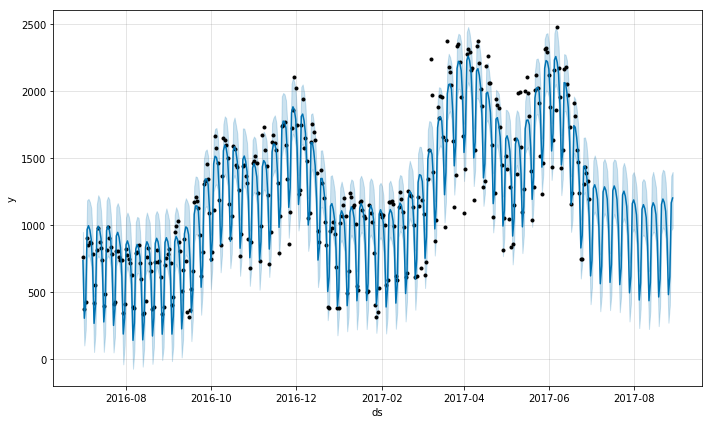

In [35]:
m.plot(forecast);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

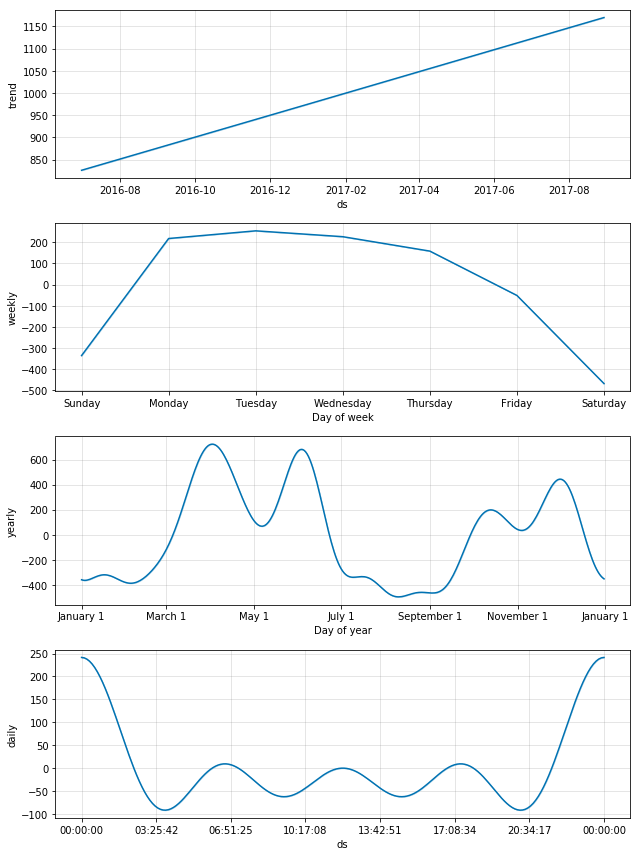

In [36]:
m.plot_components(forecast);

## 4. 주식 데이터 fbprophet으로 분석하기

#### 1. yahoo finance
- https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1

In [16]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import pandas as pd

url = 'https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1'
req = Request(url, headers={'User-Agent': 'Chrome'})
page = urlopen(req).read()
soup = BeautifulSoup(page, 'html.parser')
table = soup.find('table')
df_raw = pd.read_html(str(table))[0]
df_raw.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 08, 2021",397500.00,397500.00,388000.00,388500.00,388500.00,542514
1,"Oct 07, 2021",380500.00,394000.00,378000.00,393500.00,393500.00,832068
2,"Oct 06, 2021",373000.00,383500.00,371500.00,373000.00,373000.00,826716
3,"Oct 05, 2021",378500.00,380000.00,370000.00,370500.00,370500.00,828794
4,"Oct 01, 2021",388500.00,389500.00,381500.00,382000.00,382000.00,402239


In [21]:
# fbprophet을 사용하는 형식에 맞춰준 뒤, 맨 마지막 NaN값이 있어서 제외
df_tmp = pd.DataFrame({'ds': df_raw['Date'], 'y': df_raw['Close*']})
df_target = df_tmp[:-1]
df_target.head()

,ds,y
0,"Oct 08, 2021",388500.00
1,"Oct 07, 2021",393500.00
2,"Oct 06, 2021",373000.00
3,"Oct 05, 2021",370500.00
4,"Oct 01, 2021",382000.00


In [22]:
df = df_target.copy()
df['ds'] = pd.to_datetime(df_target['ds'], format='%b %d, %Y')
df.head()

,ds,y
0,2021-10-08,388500.00
1,2021-10-07,393500.00
2,2021-10-06,373000.00
3,2021-10-05,370500.00
4,2021-10-01,382000.00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [24]:
# 데이터형 변환 object => float

df['y'] = df['y'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [26]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [27]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
125,2021-11-03,435819.774712,424555.061730,447643.639050
126,2021-11-04,440183.547603,429804.266382,451157.814384
127,2021-11-05,443571.834845,433193.057901,454093.738045
128,2021-11-06,441912.178215,431507.112546,452884.526157
129,2021-11-07,444030.247793,432856.698287,455169.391736


C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

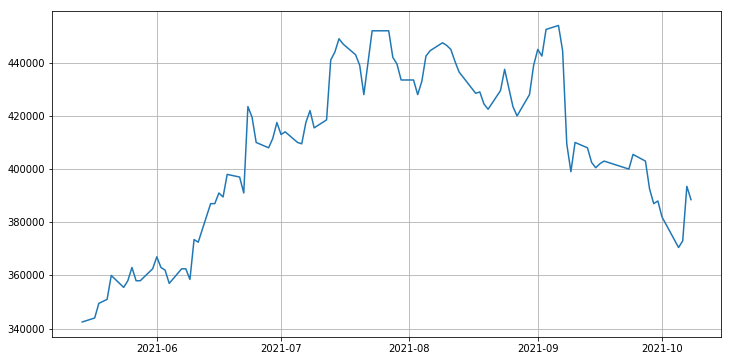

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='real')
plt.grid()
plt.show()

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

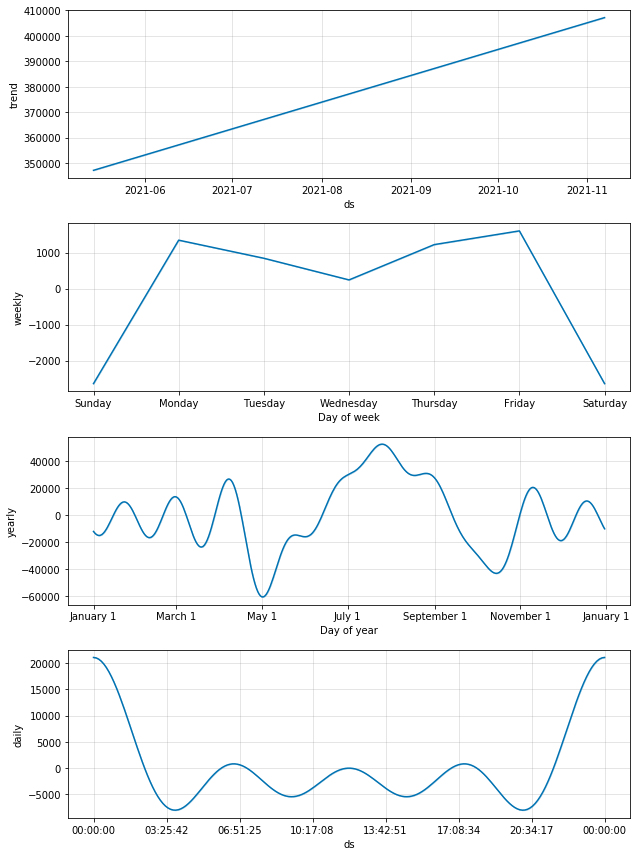

In [29]:
m.plot_components(forecast);

#### 2. KIA

In [30]:
!pip install yfinance

In [31]:
# 기아 자동차의 종목코드를 가지고 기간을 입력한다
import yfinance as yf
from pandas_datareader import data

yf.pdr_override()

start_date = '2010-03-01'
end_date = '2018-02-28'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [32]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17800.664062,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,18248.730469,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,18330.199219,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,18533.869141,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,18574.599609,4326618


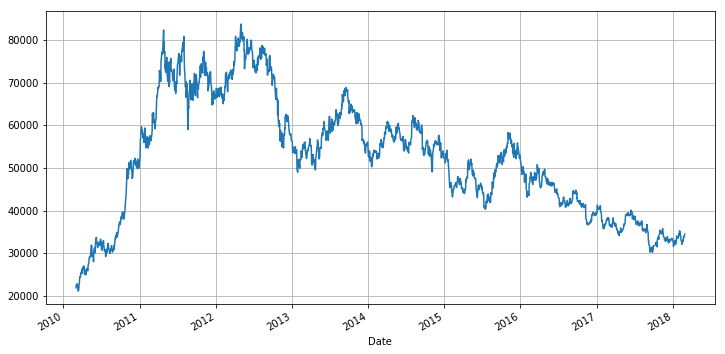

In [34]:
KIA['Close'].plot(figsize=(12, 6), grid=True);

In [35]:
# accuracy 확인을 위한 데이터
KIA_trunc = KIA[:'2017-11-30']
KIA_trunc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17800.664062,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,18248.730469,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,18330.199219,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,18533.869141,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,18574.599609,4326618


In [36]:
# forecast를 위한 준비
df = pd.DataFrame({'ds': KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [37]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [38]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2001,2018-02-24,26879.820301,22653.194488,30788.977864
2002,2018-02-25,26962.113329,22800.976099,30997.592100
2003,2018-02-26,27189.323268,23264.184419,31097.939295
2004,2018-02-27,27353.074108,22935.068892,31673.473225
2005,2018-02-28,27398.864477,22957.090299,31427.130941


C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


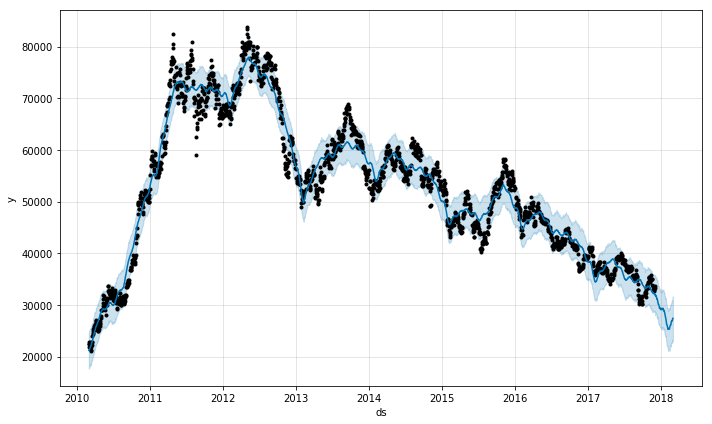

In [39]:
m.plot(forecast);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

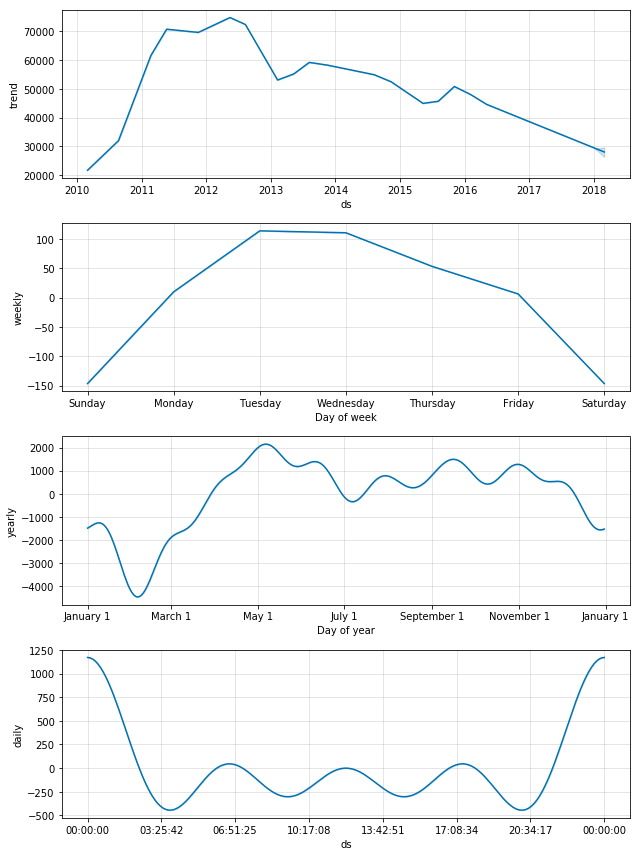

In [40]:
m.plot_components(forecast);

In [41]:
KIA['Close']

Date
2010-03-02    21850.0
2010-03-03    22400.0
2010-03-04    22500.0
2010-03-05    22750.0
2010-03-08    22800.0
               ...   
2018-02-21    33850.0
2018-02-22    33650.0
2018-02-23    34000.0
2018-02-26    34200.0
2018-02-27    34450.0
Name: Close, Length: 1972, dtype: float64

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

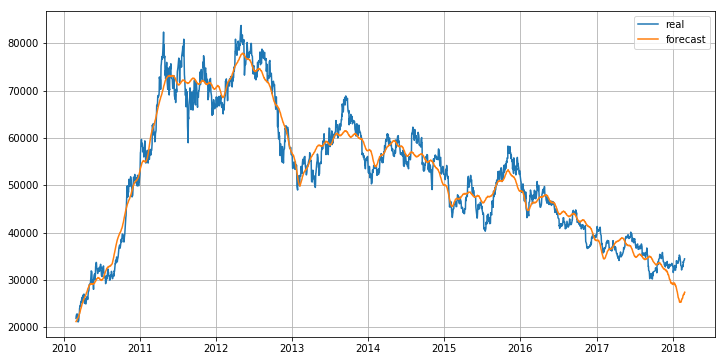

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid(True)
plt.legend()
plt.show()

#### 3. 대한항공

In [44]:
# 003490 대한항공

start_date = '2010-03-01'
end_date = '2018-02-28'
KoreaAir = data.get_data_yahoo('003490.KS', start_date, end_date)
KoreaAir.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-21,35350.0,35950.0,35150.0,35350.0,35167.996094,237279
2018-02-22,35050.0,35450.0,34800.0,35000.0,34819.800781,260174
2018-02-23,35200.0,35400.0,34550.0,35150.0,34969.027344,321125
2018-02-26,35300.0,35550.0,33600.0,33900.0,33725.460938,932870
2018-02-27,33900.0,34300.0,33650.0,33900.0,33725.460938,527398


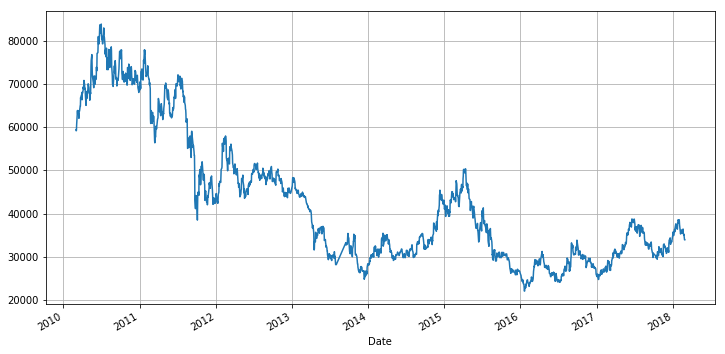

In [45]:
KoreaAir['Close'].plot(figsize=(12, 6), grid=True);

In [47]:
# accuracy 데이터 분리
KoreaAir_trunc = KoreaAir[:'2017-11-30']
KoreaAir_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-24,32900.0,33250.0,32300.0,32500.0,32168.935547,530941
2017-11-27,32600.0,32800.0,31800.0,31850.0,31525.556641,472095
2017-11-28,32050.0,32500.0,31550.0,31600.0,31278.103516,708754
2017-11-29,31850.0,32250.0,31050.0,31300.0,30981.160156,850385
2017-11-30,31800.0,32050.0,31350.0,31350.0,31030.650391,682573


In [50]:
# forecast를 위한 준비
df = pd.DataFrame({'ds': KoreaAir_trunc.index, 'y': KoreaAir_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-03-02,59390.417969
1,2010-03-03,59190.785156
2,2010-03-04,59290.601562
3,2010-03-05,60588.207031
4,2010-03-08,62784.152344


In [51]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [53]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1970,2018-02-24,34942.008480,30558.000098,39218.123001
1971,2018-02-25,34845.145220,31009.258041,39102.308719
1972,2018-02-26,35719.057199,31484.633769,39836.455293
1973,2018-02-27,35561.138431,31229.326269,39709.589293
1974,2018-02-28,35497.487623,31386.690038,40033.375119


C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


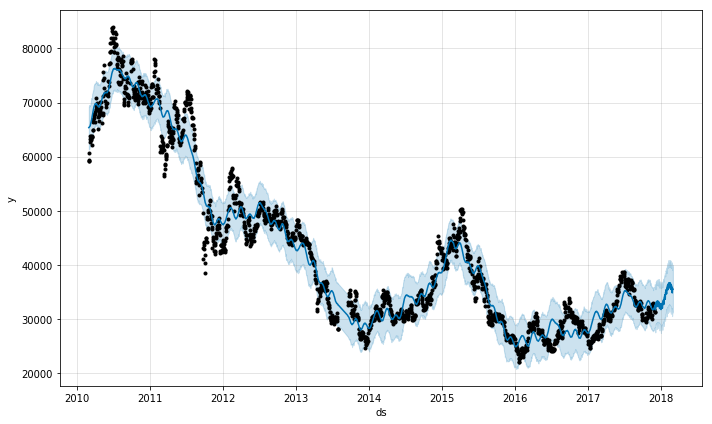

In [54]:
m.plot(forecast);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

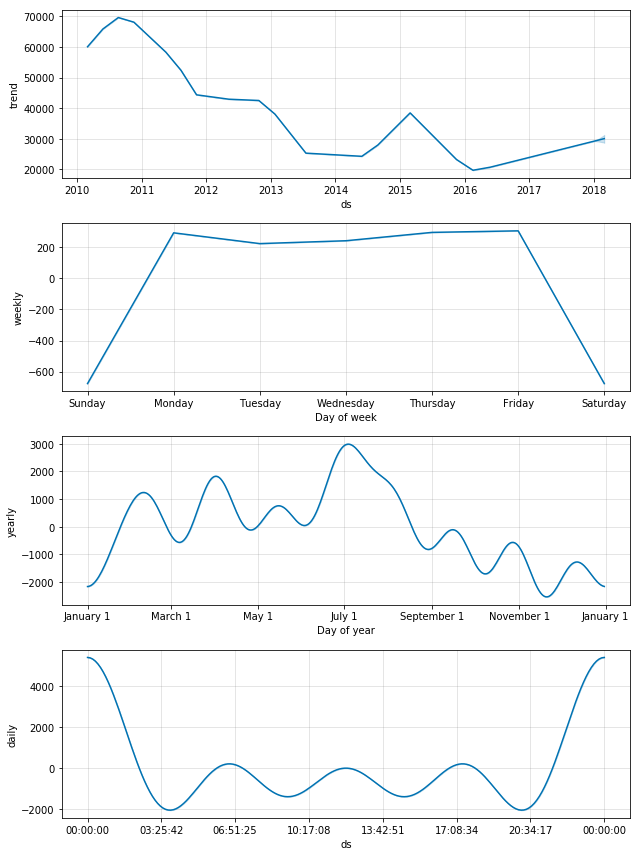

In [55]:
m.plot_components(forecast);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

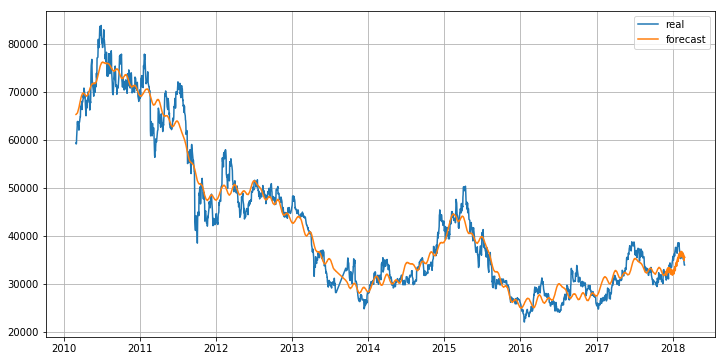

In [56]:
# 실제와 예측값 비교 그래프
plt.figure(figsize=(12, 6))
plt.plot(KoreaAir.index, KoreaAir['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid(True)
plt.legend()
plt.show()

#### 4. 조금 특이한 형태의 데이터에 대한 forecast

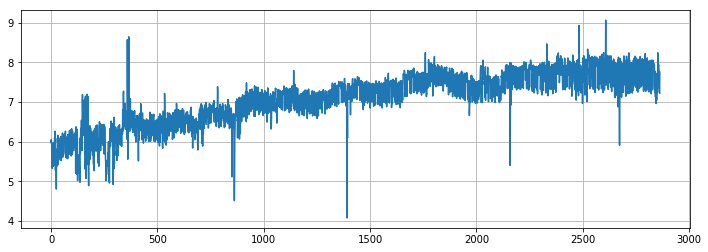

In [58]:
# Logistic 성장형 그래프를 가진 데이터에 대한 forecast
df = pd.read_csv('../data/05_example_wp_R2.csv', index_col=0)
df['y'].plot(figsize=(12, 4), grid=True)

In [59]:
df['cap'] = 8.5
df.tail()

,ds,y,cap
2858,2015-12-11,7.834788,8.5
2859,2015-12-12,7.360104,8.5
2860,2015-12-13,7.479864,8.5
2861,2015-12-18,7.765145,8.5
2862,2015-12-19,7.220374,8.5


In [60]:
m = Prophet(growth='logistic', daily_seasonality=True, yearly_seasonality=True)
m.fit(df);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


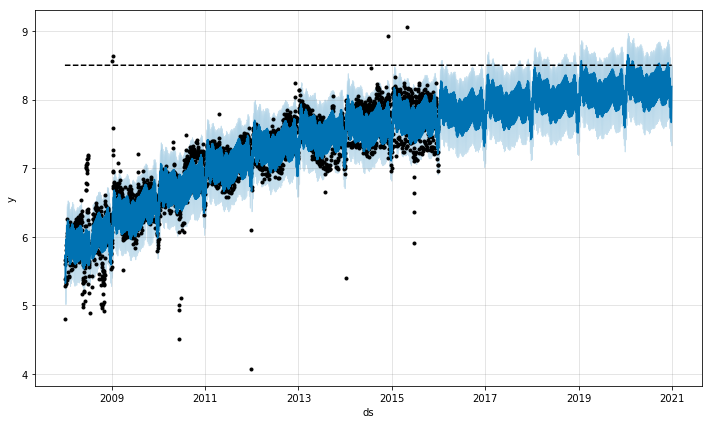

In [61]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
forecast = m.predict(future)
m.plot(forecast);

## 5. 비트코인 데이터 fbprophet으로 분석하기

- https://bitcoincharts.com/charts/bitstampUSD#rg60ztgSzm1g10zm2g25zv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
from fbprophet import Prophet

%matplotlib inline

In [2]:
url = 'https://bitcoincharts.com/charts/bitstampUSD#rg730ztgSzm1g10zm2g25zv'
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get(url)

In [3]:
# 스크롤
xpath = '//*[@id="content_chart"]/div/div[2]/a'
variable = driver.find_element_by_xpath(xpath)
driver.execute_script('return arguments[0].scrollIntoView();', variable)
variable.click()

In [77]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', 'data')
table

<table class="data" id="chart_table" style="display: table;">
<thead>
<tr>
<th>Timestamp</th><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume (BTC)</th><th>Volume (Currency)</th><th>Weighted Price</th>
</tr>
</thead>
<tbody>
<tr><td>2019-10-13 00:00:00</td><td>8303.43</td><td>8474.48</td><td>8132.91</td><td>8282.96</td><td>4445.28</td><td>37082713.92</td><td>8342.04</td></tr><tr><td>2019-10-14 00:00:00</td><td>8278.39</td><td>8416.67</td><td>8215.41</td><td>8362.99</td><td>4294.61</td><td>35705415.19</td><td>8314.01</td></tr><tr><td>2019-10-15 00:00:00</td><td>8353.33</td><td>8420.85</td><td>8086</td><td>8155.13</td><td>5044.66</td><td>41647353.51</td><td>8255.73</td></tr><tr><td>2019-10-16 00:00:00</td><td>8162.45</td><td>8179.1</td><td>7912.66</td><td>7995.89</td><td>8644.4</td><td>69316753.57</td><td>8018.69</td></tr><tr><td>2019-10-17 00:00:00</td><td>7995.73</td><td>8130.71</td><td>7936.71</td><td>8073.32</td><td>5395.89</td><td>43466038.76</td><td>8055.4</td></tr><t

In [78]:
driver.quit()

In [79]:
df = pd.read_html(str(table))
bitcoin = df[0]
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2019-10-13 00:00:00,8303.43,8474.48,8132.91,8282.96,4445.28,37082713.92,8342.04
1,2019-10-14 00:00:00,8278.39,8416.67,8215.41,8362.99,4294.61,35705415.19,8314.01
2,2019-10-15 00:00:00,8353.33,8420.85,8086.00,8155.13,5044.66,41647353.51,8255.73
3,2019-10-16 00:00:00,8162.45,8179.10,7912.66,7995.89,8644.40,69316753.57,8018.69
4,2019-10-17 00:00:00,7995.73,8130.71,7936.71,8073.32,5395.89,43466038.76,8055.40


In [80]:
bitcoin.to_csv('../data/05_bitcoin_history_new2.csv', sep=',')

In [81]:
bitcoin = pd.read_csv('../data/05_bitcoin_history_new2.csv', index_col=0)
bitcoin.tail()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
725,2021-10-07 00:00:00,55360.10,55360.32,53289.57,53787.60,2349.70,1.275100e+08,54266.46
726,2021-10-08 00:00:00,53816.16,56168.00,53623.02,53957.21,2217.76,1.213333e+08,54709.97
727,2021-10-09 00:00:00,53952.82,55512.05,53674.69,54976.92,1061.02,5.821879e+07,54870.42
728,2021-10-10 00:00:00,54984.49,56561.00,51000.00,54714.95,1735.42,9.565476e+07,55119.02
729,2021-10-11 00:00:00,54657.00,57092.62,54462.45,56607.40,697.62,3.930959e+07,56348.08


In [82]:
# 분석하고 싶은 항목(Close)만 가지고, Prophet 적용

df = pd.DataFrame({'ds': bitcoin['Timestamp'], 'y':bitcoin['Close']})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


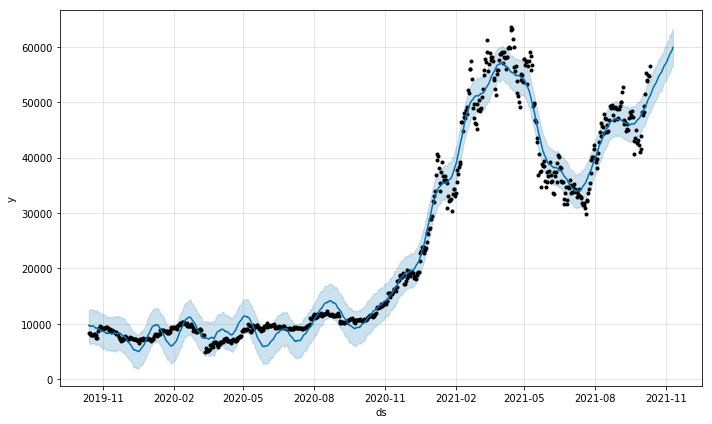

In [83]:
# 향후 30일간의 forecast
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\seonwook\miniconda3\envs\py37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional in

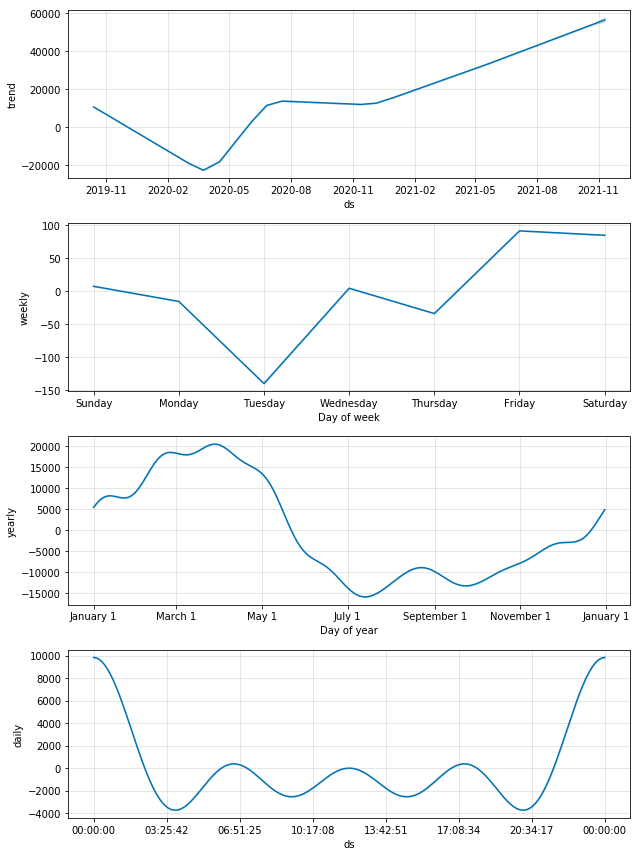

In [84]:
# 트렌드
m.plot_components(forecast);